In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from PIL import Image

In [2]:
class extract_feature_colors:
    """
    提取图片的特征颜色，包括构建颜色映射和绘制颜色映射。
    """
    def __init__(self,img_path,num_colors=25):
        """
        初始化函数。

        参数：
        - img_path: str 图片路径
        - num_colors: int 需要提取的特征颜色数量，默认值为 25
        """
        self.imgpath=img_path
        self.numcolors=num_colors
    
    def RGB_to_Hex(self,rgb):
        """
        将 RGB 格式的颜色转换为十六进制格式。

        参数：
        - rgb: tuple 包含三个整数的 RGB 颜色元组

        返回值：
        - color: str 十六进制格式的颜色代码
        """
        color = '#'
        for i in rgb:
            num = int(i)
            color += str(hex(num))[-2:].replace('x', '0').upper()
        return color
    
    def draw_cm(self,savefig=True,cmname="colormap.png"):
        """
        绘制颜色映射，并将结果保存到 colormap.png 文件中。

        参数：
        - savefig: bool 是否保存图像，True 表示保存，False 表示不保存，默认值为 True
        - cmname: str 保存的图像名称，仅在 savefig 为 True 时生效，默认值为 "colormap.png"
        """
        fig,axes=plt.subplots(figsize=(1*self.numcolors,2))
        axes.imshow([np.arange(len(self.colormap()))],cmap=ListedColormap(self.colormap()),aspect="auto")
        axes.set_xticks(np.arange(len(self.colormap())),self.colormap())
        axes.set_yticks([])
        axes.grid(False)
        axes.spines["top"].set_visible(False)
        axes.spines["bottom"].set_visible(False)
        axes.spines["left"].set_visible(False)
        axes.spines["right"].set_visible(False)
        axes.tick_params(axis='both',which='both',length=0)
        if savefig== True:
            fig.savefig(cmname,dpi=600)

    def rgb_sort(self,x):
        """
        对颜色排序，将十六进制数转换为整数进行排序。

        参数：
        - x: str 十六进制格式的颜色代码

        返回值：
        - int(x[1:], 16): int 十六进制数转换后的整数
        """
        return int(x[1:], 16)

    def colormap(self):
        """
        构建颜色映射。

        返回值：
        - colormap: list 包含 num_colors 种颜色代码的字符串列表，按顺序排列（从深到浅）
        """
        image = Image.open(self.imgpath)
        small_image = image
        result = small_image.convert('P', palette=Image.Palette.ADAPTIVE, colors=self.numcolors)   # image with 5 dominating colors
        result = result.convert('RGB')
        main_colors = result.getcolors()
        colormap=[]
        for i in range(len(main_colors)):
            colormap.append(self.RGB_to_Hex(main_colors[i][1]))
            
        colormap=sorted(colormap,key=self.rgb_sort)
        colormap.reverse()
        return colormap

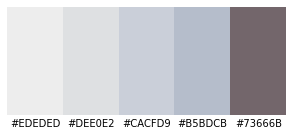

In [4]:
extract_feature_colors("bingbing.png",5).draw_cm()